
# Data loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#from google.colab import drive

#drive.mount("/content/drive")

In [2]:
data=pd.read_csv('./heart_statlog_cleveland_hungary_final.csv')
# https://www.kaggle.com/code/nayanack/heart-disease-prediction-acc-95#Exploratory-Data-Analysis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [3]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

# Starting Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [6]:
x=data.drop('target',axis=1)
y=data['target']

# Spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
# Building Model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
y_pred=rfc.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.93      0.95      0.94       129

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



# Data Exploration

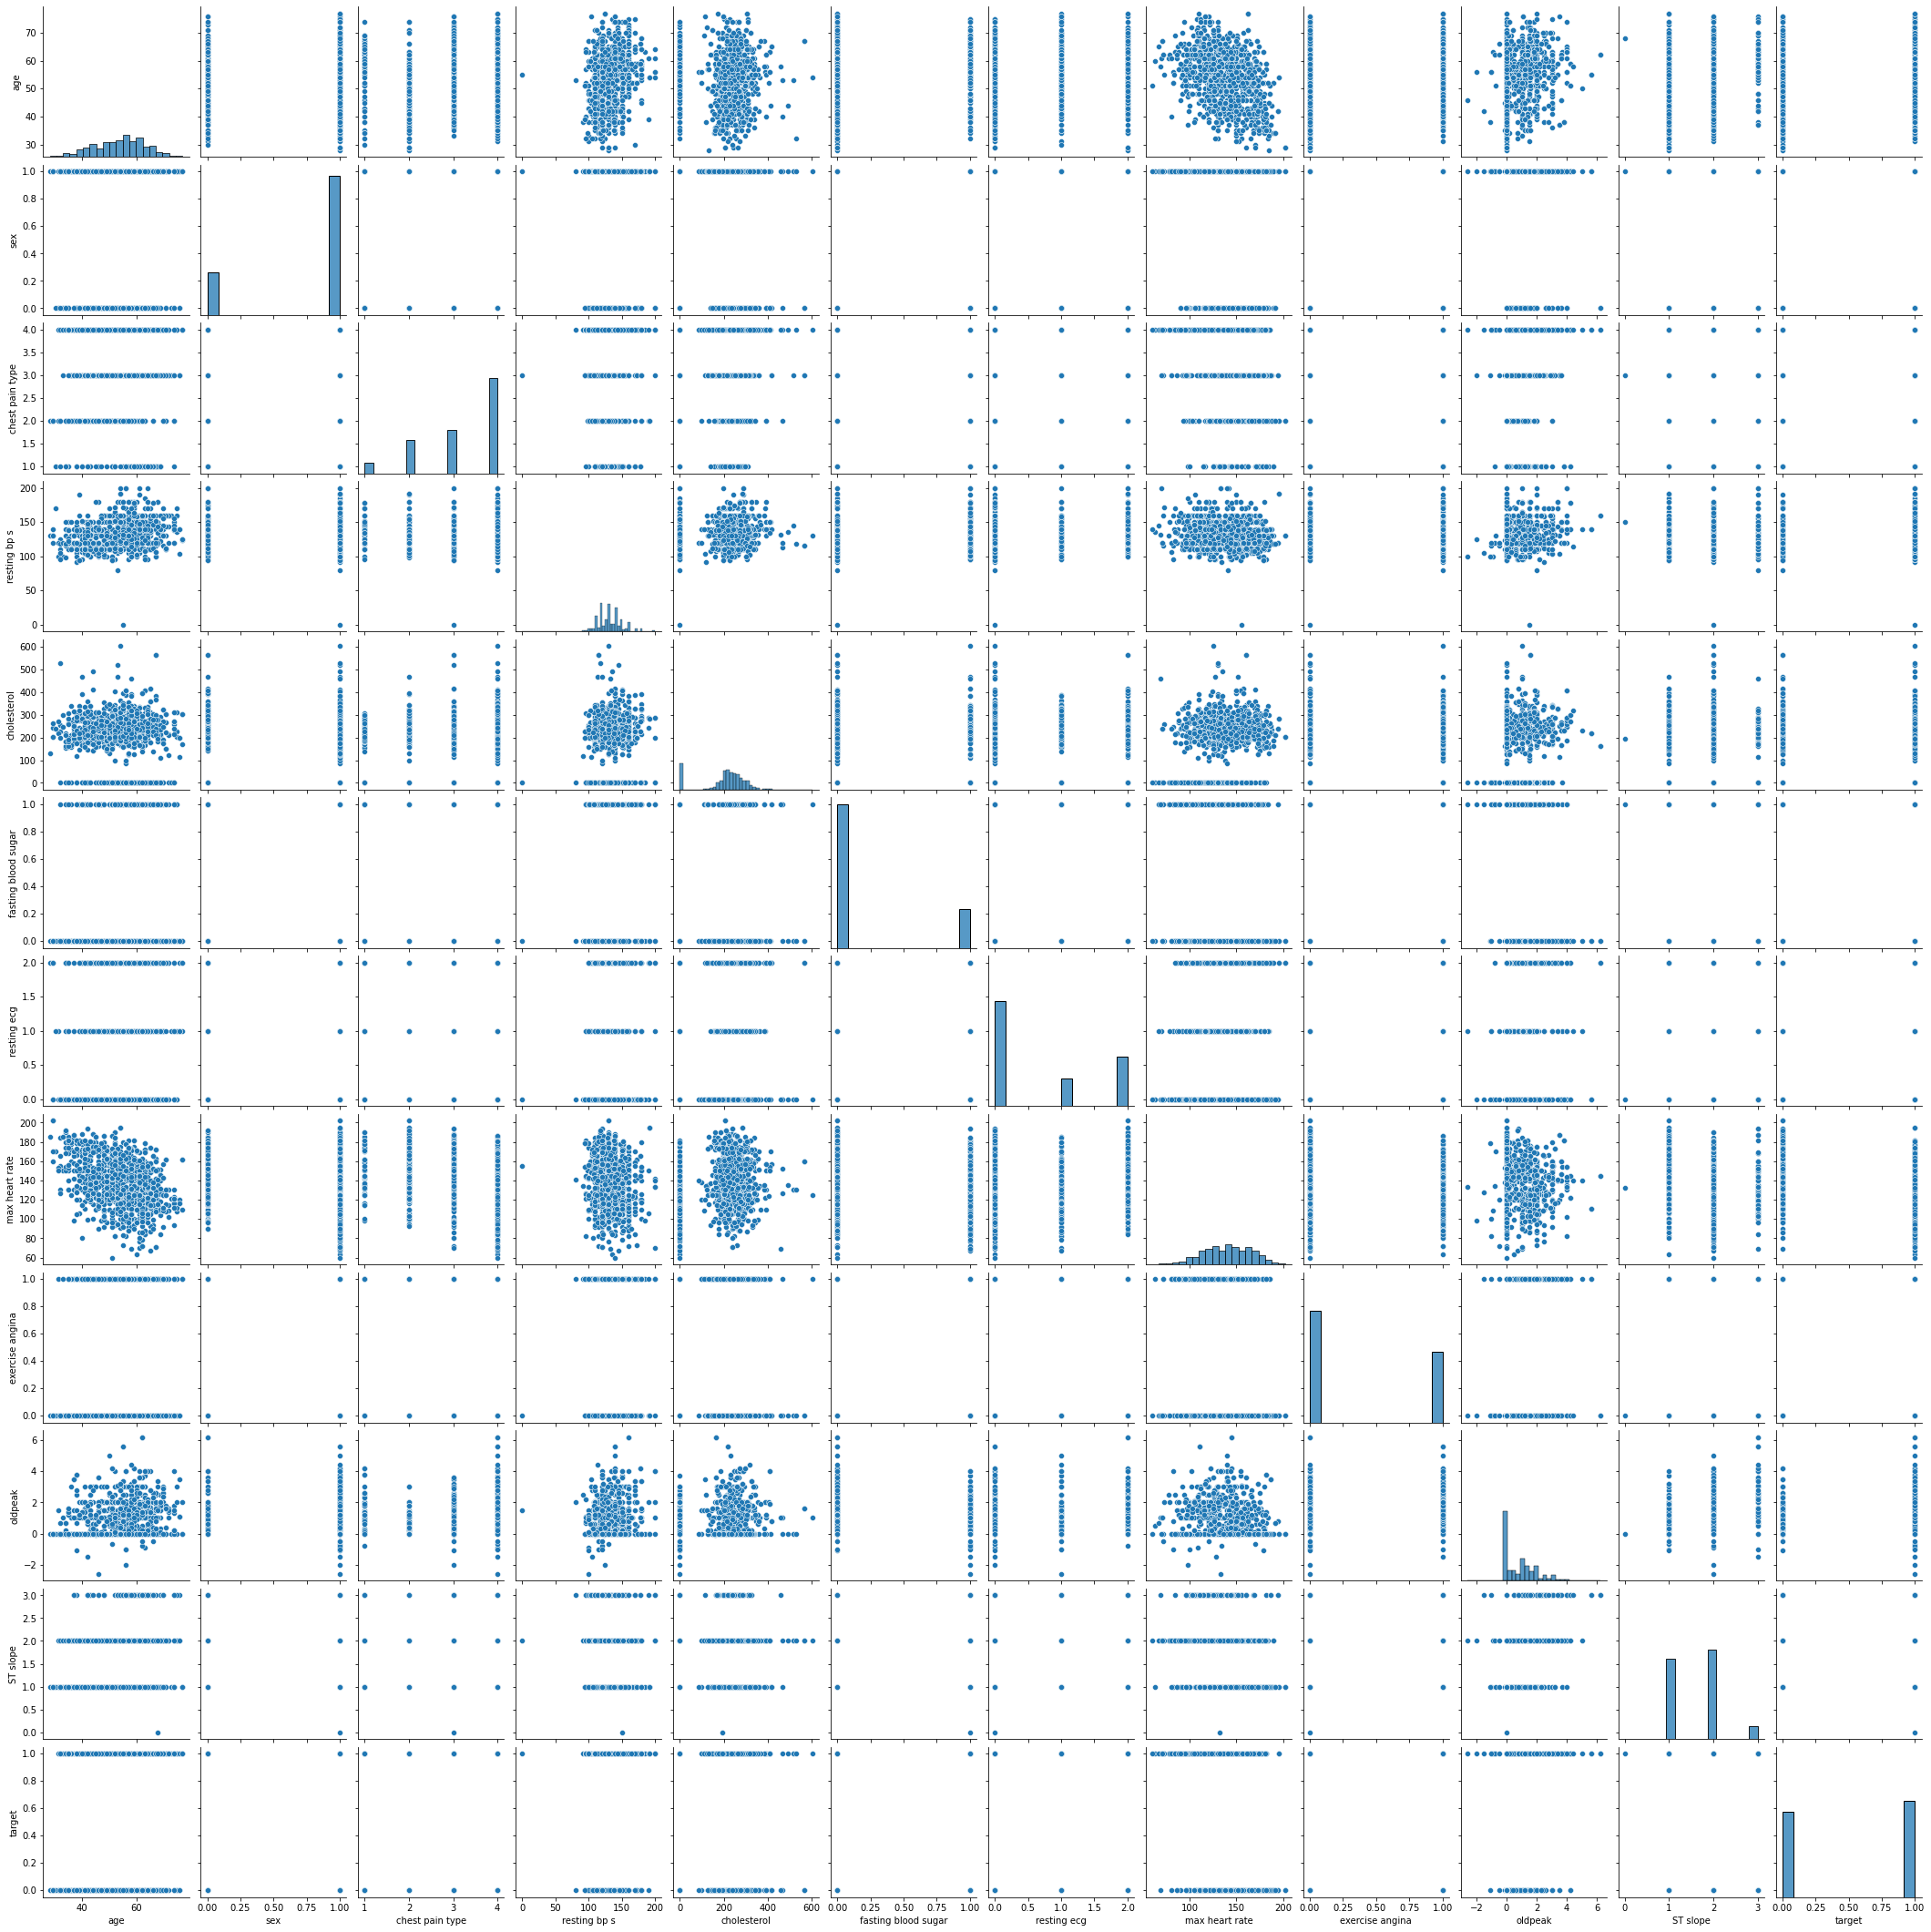

In [9]:
sns.pairplot(data)

In [10]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution')

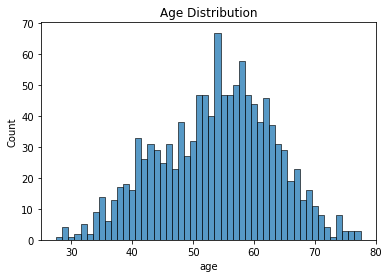

In [11]:
sns.histplot(x='age', data=data, discrete=True)
plt.title('Age Distribution')

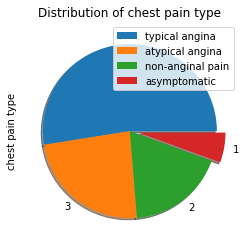

In [12]:
data['chest pain type'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0,0.1))
plt.legend(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], loc='best')
plt.title('Distribution of chest pain type')
plt.show()

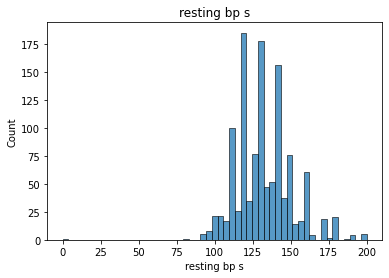

In [13]:
sns.histplot(x='resting bp s',data=data)
plt.title('resting bp s')
plt.show()

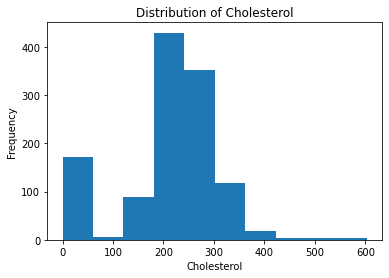

In [14]:
plt.hist(data['cholesterol'],)

plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol')

plt.show()

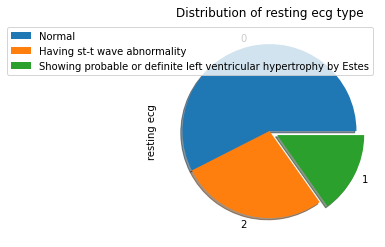

In [15]:
data['resting ecg'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0.1))
plt.legend(labels=['Normal', 'Having st-t wave abnormality', 'Showing probable or definite left ventricular hypertrophy by Estes'], loc='best')
plt.title('Distribution of resting ecg type')
plt.show()

# Make data dirty

In [16]:
# Noise as gaussian curve
data_noised = data.copy()
gaussian_noise = np.random.normal(250, 200, len(data['cholesterol']))

data_noised['cholesterol'] = data['cholesterol'] + gaussian_noise

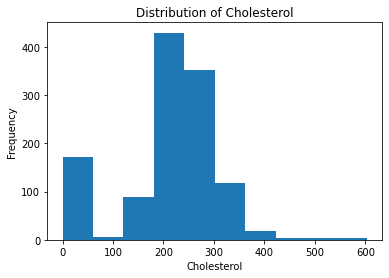

In [17]:
plt.hist(data['cholesterol'],)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol')

plt.show()

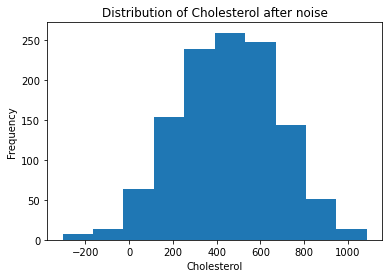

In [18]:
plt.hist(data_noised['cholesterol'],)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol after noise')

plt.show()

# Cleaning data

### Data Constraint

- age: 28 -> 77 
- sex: 0 or 1
- chest pain type: 1,2,3 or 4
- resting bp s: 0 -> 200 
- cholesterol: 0 -> 603
- fasting blood sugar: 0 or 1
- resting ecg: 0,1 or 2
- max heart rate: 60 -> 202
- exercise angina: 0 or 1
- oldpeak: -2,6 -> 6,2
- ST slope: 0,1 or 2

### HoloClean

Installa PostgreSQL, definisci delle costanti e lui pulisce
https://github.com/HoloClean/holoclean/tree/master

### CleanML

Definisci le costanti e lui sistema il db
https://github.com/chu-data-lab/CleanML